<h1></h1>

<center>
    <h1>
        <b>Inteligencia Artificial</b>
    </h1>
</center>
<center>
    <h2>
        Análisis libre de un catálogo de datos
    </h2>
</center>
<center>
    <h3>
        <div class="alert alert-block alert-warning">
            Actividad Grupal      
        </div>
    </h3>
</center>

Emanuel Gaviria Vargas<br>
Sofia Neiva Monsalve<br>
Moises David Chiari Almengor<br>
Yuli Natalia Suárez Rodriguez<br>

### Librerias necesarias

In [1]:
#!pip install --upgrade scikit-learn --user
#!pip install --upgrade threadpoolctl --user

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from numpy import unique
from numpy import where
from scipy import stats

### Importar datos

In [3]:
covid=pd.read_excel(r'C:\Users\sofyn\Documents\UNIR\NOTAS UNIR\PRIMER CUATRIMESTRE\INTELIGENCIA ARTIFICIAL\ACTIVIDAD 3 - GRUPAL\ACT3.xlsx',sheet_name='COVID')
nacimientos=pd.read_excel(r'C:\Users\sofyn\Documents\UNIR\NOTAS UNIR\PRIMER CUATRIMESTRE\INTELIGENCIA ARTIFICIAL\ACTIVIDAD 3 - GRUPAL\ACT3.xlsx',sheet_name='NACIMIENTO')

In [4]:
covid['LUGAR']=covid['LUGAR'].str.upper()
nacimientos['LUGAR']=nacimientos['LUGAR'].str.upper()

In [5]:
covid

,year,LUGAR,cases,deaths
0,2020,AFGHANISTAN,49273,1971
1,2020,ALBANIA,48530,1003
2,2020,ALGERIA,92102,2596
3,2020,ANDORRA,7338,79
4,2020,ANGOLA,16188,371
...,...,...,...,...
209,2020,VIETNAM,1397,35
210,2020,WALLIS_AND_FUTUNA,3,0
211,2020,YEMEN,2083,606
212,2020,ZAMBIA,18274,367


In [6]:
nacimientos

,LUGAR,PROMEDIO,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA
0,AFGHANISTAN,88.525333,84.296000,0,4.229333
1,AFRICA EASTERN AND SOUTHERN,99.846934,97.413585,0,2.433349
2,AFRICA WESTERN AND CENTRAL,109.857612,107.580169,0,2.277443
3,ALBANIA,15.726000,14.672000,0,1.054000
4,ALGERIA,12.609667,12.057000,0,0.552667
...,...,...,...,...,...
260,WEST BANK AND GAZA,46.950667,44.531000,0,2.419667
261,WORLD,44.124518,42.748219,0,1.376299
262,YEMEN,59.021667,56.160000,0,2.861667
263,ZAMBIA,125.333333,119.009000,0,6.324333


In [7]:
data=covid.merge(nacimientos, on='LUGAR')

De los 214 paises de la base de covid se encuentran 212 en la base de nacimiento

In [8]:
data

,year,LUGAR,cases,deaths,PROMEDIO,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA
0,2020,AFGHANISTAN,49273,1971,88.525333,84.296000,0,4.229333
1,2020,ALBANIA,48530,1003,15.726000,14.672000,0,1.054000
2,2020,ALGERIA,92102,2596,12.609667,12.057000,0,0.552667
3,2020,ANDORRA,7338,79,6.156333,6.091000,0,0.065333
4,2020,ANGOLA,16188,371,143.029333,139.825000,0,3.204333
...,...,...,...,...,...,...,...,...
207,2020,VIETNAM,1397,35,34.502667,34.709000,1,0.206333
208,2020,WALLIS_AND_FUTUNA,3,0,45.492589,44.448854,0,1.043736
209,2020,YEMEN,2083,606,59.021667,56.160000,0,2.861667
210,2020,ZAMBIA,18274,367,125.333333,119.009000,0,6.324333


In [9]:
data=data.fillna(0)
lugares=data['LUGAR']
data=data.loc[:,['cases','TASA NATALIDAD','COMPORTAMIENTO','DIFERENCIA']]

In [10]:
data

,cases,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA
0,49273,84.296000,0,4.229333
1,48530,14.672000,0,1.054000
2,92102,12.057000,0,0.552667
3,7338,6.091000,0,0.065333
4,16188,139.825000,0,3.204333
...,...,...,...,...
207,1397,34.709000,1,0.206333
208,3,44.448854,0,1.043736
209,2083,56.160000,0,2.861667
210,18274,119.009000,0,6.324333


### Eliminando datos atípicos

In [11]:
#Eliminación de datos atípicos
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    return df[(np.abs(z_scores) < threshold)]

df_cleaned = remove_outliers_zscore(data, 'cases')
df_cleaned = remove_outliers_zscore(data, 'TASA NATALIDAD')
df_cleaned = remove_outliers_zscore(data, 'DIFERENCIA')

data=df_cleaned


In [12]:
data

,cases,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA
0,49273,84.296000,0,4.229333
1,48530,14.672000,0,1.054000
2,92102,12.057000,0,0.552667
3,7338,6.091000,0,0.065333
4,16188,139.825000,0,3.204333
...,...,...,...,...
207,1397,34.709000,1,0.206333
208,3,44.448854,0,1.043736
209,2083,56.160000,0,2.861667
210,18274,119.009000,0,6.324333


In [13]:
data.columns

Index(['cases', 'TASA NATALIDAD', 'COMPORTAMIENTO', 'DIFERENCIA'], dtype='object')

### Normalizar datos

In [14]:
#NORMALIZAR LOS DATOS NUMERICOS
def minmax_normalizacion(df):
    return (df - df.min()) / ( df.max() - df.min())

col1_max=data['cases'].max()
col1_min=data['cases'].min()
col2_max=data['TASA NATALIDAD'].max()
col2_min=data['TASA NATALIDAD'].min()
col3_max=data['DIFERENCIA'].max()
col3_min=data['DIFERENCIA'].min()

data['cases'] = minmax_normalizacion(data['cases'])
data['TASA NATALIDAD']=minmax_normalizacion(data['TASA NATALIDAD'])
data['DIFERENCIA']=minmax_normalizacion(data['DIFERENCIA'])

data= data.dropna()


C:\Users\sofyn\AppData\Local\Temp\ipykernel_6676\310521389.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cases'] = minmax_normalizacion(data['cases'])
C:\Users\sofyn\AppData\Local\Temp\ipykernel_6676\310521389.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TASA NATALIDAD']=minmax_normalizacion(data['TASA NATALIDAD'])
C:\Users\sofyn\AppData\Local\Temp\ipykernel_6676\310521389.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [15]:
data

,cases,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA
0,3.030864e-03,0.481799,0,0.486317
1,2.985159e-03,0.074717,0,0.120706
2,5.665399e-03,0.059427,0,0.062982
3,4.513201e-04,0.024545,0,0.006870
4,9.957093e-04,0.806469,0,0.368298
...,...,...,...,...
207,8.587201e-05,0.191871,1,0.023105
208,1.230258e-07,0.248818,0,0.119524
209,1.280699e-04,0.317292,0,0.328843
210,1.124025e-03,0.684761,0,0.727538


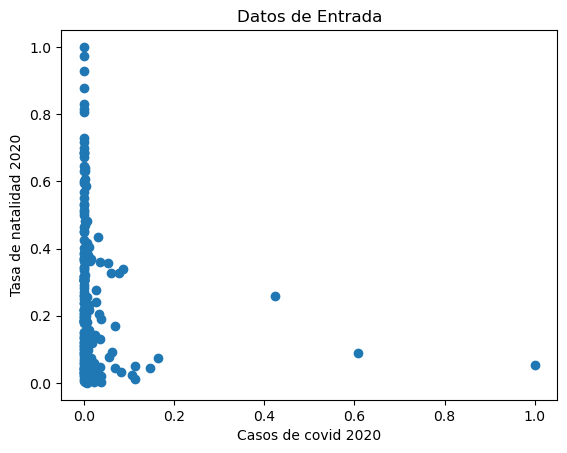

In [16]:
plt.scatter(data['cases'],data['TASA NATALIDAD'], cmap='viridis')
plt.title('Datos de Entrada')
plt.xlabel('Casos de covid 2020')
plt.ylabel('Tasa de natalidad 2020')
plt.show()

### Correlación de datos

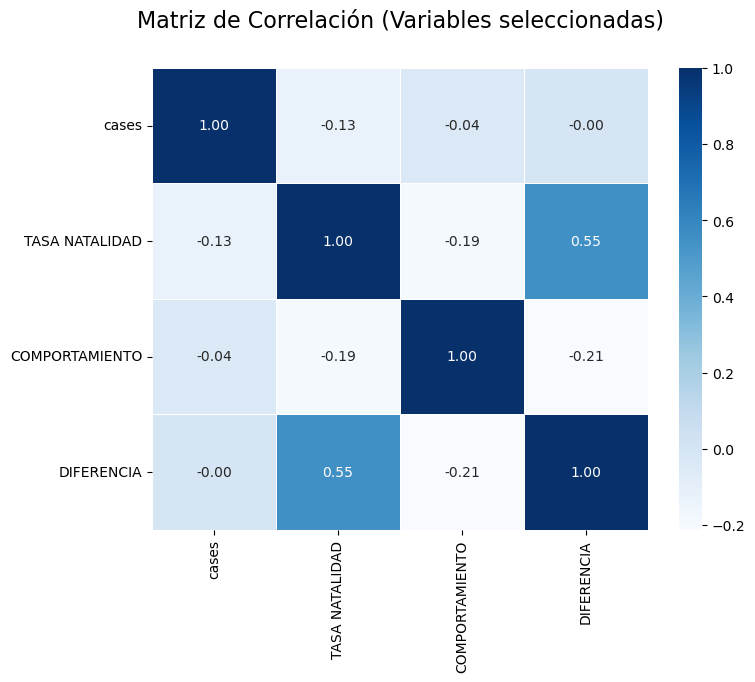

In [17]:
df_selected = data 

# Matriz de correlación para las variables seleccionadas
correlation_matrix_selected = df_selected.corr()

# Crear un mapa de calor para las variables seleccionadas
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected,
            annot=True,
            cmap='Blues',
            fmt='.2f',
            linewidths=0.5)
plt.title('Matriz de Correlación (Variables seleccionadas)', size=16, y=1.07)
plt.show()

### Metodo del codo

Se utiliza el metodo del codo para conocer la cantidad de grupos optimos, el metodo del codo calcula la varianza explicada (suma de distancias al cuadrado de cada centroide de cada cluster)
Se busca el punto donde la varianza deja de disminuir rapidamente

C:\Users\sofyn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sofyn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sofyn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sofyn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

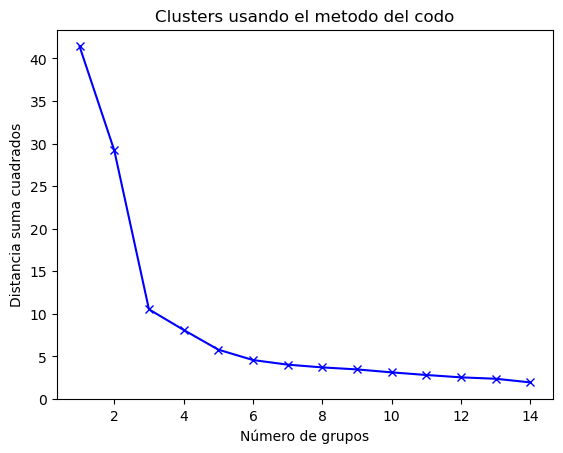

In [19]:
distancia_suma_cuadrados = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    distancia_suma_cuadrados.append(kmeans.inertia_)
    
plt.plot(range(1, 15), distancia_suma_cuadrados, 'bx-')
plt.title('Clusters usando el metodo del codo')
plt.xlabel('Número de grupos')
plt.ylabel('Distancia suma cuadrados')
plt.show()


### K-Means

In [20]:
#k-means y cantidad de personas por grupo
#Se utiliza el codigo para hacer los grupos
k_means_optimo = KMeans(n_clusters=5,random_state = 0)

#Se ajustan los datos, se escoge los centroides en donde la varianza sea minima
k_means_optimo.fit(data)

#Se utiliza el modelo para predecir a que grupo pertenece cada fila
y_hat_optimo = k_means_optimo.predict(data)

#grupo asignado a cada fila
cantidad_optimo_data = k_means_optimo.labels_

#revisar cuantas etiquetas unicas hay
clusters= unique(y_hat_optimo)

C:\Users\sofyn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


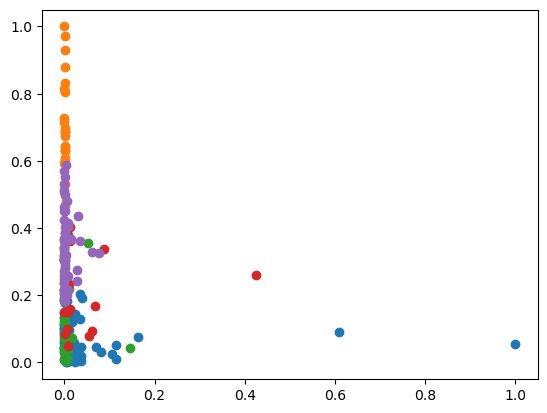

In [21]:
#Se realiza el diagrama de dispersión a partir de dos columnas del dataframde
data_reset = data.reset_index(drop=True)
for cluster in clusters:
    row_ix=where(y_hat_optimo==cluster)
    plt.scatter(data_reset.loc[row_ix, "cases"], data_reset.loc[row_ix, "TASA NATALIDAD"])
plt.show()

C:\Users\sofyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


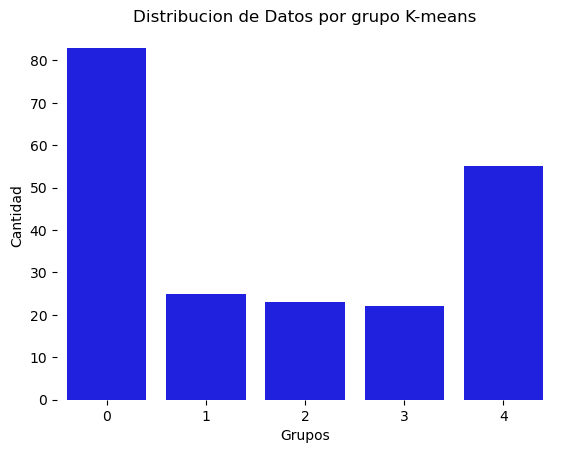

In [22]:
sns.countplot(cantidad_optimo_data, color = 'b'  )
plt.title('Distribucion de Datos por grupo K-means')
plt.xlabel('Grupos')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)


### Base de datos completa

In [23]:
data['Categoria K-means']=cantidad_optimo_data
data['LUGAR']=lugares

In [24]:
data['Categoria K-means'].value_counts()

0    83
4    55
1    25
2    23
3    22
Name: Categoria K-means, dtype: int64

In [25]:
data

,cases,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA,Categoria K-means,LUGAR
0,3.030864e-03,0.481799,0,0.486317,1,AFGHANISTAN
1,2.985159e-03,0.074717,0,0.120706,0,ALBANIA
2,5.665399e-03,0.059427,0,0.062982,0,ALGERIA
3,4.513201e-04,0.024545,0,0.006870,0,ANDORRA
4,9.957093e-04,0.806469,0,0.368298,1,ANGOLA
...,...,...,...,...,...,...
207,8.587201e-05,0.191871,1,0.023105,2,VIETNAM
208,1.230258e-07,0.248818,0,0.119524,4,WALLIS_AND_FUTUNA
209,1.280699e-04,0.317292,0,0.328843,4,YEMEN
210,1.124025e-03,0.684761,0,0.727538,1,ZAMBIA


In [26]:
data['cases']=data['cases']*(col1_max-col1_min)+col1_min
data['TASA NATALIDAD']=data['TASA NATALIDAD']*(col2_max-col2_min)+col2_min
data['DIFERENCIA']=data['DIFERENCIA']*(col3_max-col3_min)+col3_min


In [27]:
data

,cases,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA,Categoria K-means,LUGAR
0,49273.0,84.296000,0,4.229333,1,AFGHANISTAN
1,48530.0,14.672000,0,1.054000,0,ALBANIA
2,92102.0,12.057000,0,0.552667,0,ALGERIA
3,7338.0,6.091000,0,0.065333,0,ANDORRA
4,16188.0,139.825000,0,3.204333,1,ANGOLA
...,...,...,...,...,...,...
207,1397.0,34.709000,1,0.206333,2,VIETNAM
208,3.0,44.448854,0,1.043736,4,WALLIS_AND_FUTUNA
209,2083.0,56.160000,0,2.861667,4,YEMEN
210,18274.0,119.009000,0,6.324333,1,ZAMBIA


In [28]:
data.columns

Index(['cases', 'TASA NATALIDAD', 'COMPORTAMIENTO', 'DIFERENCIA',
       'Categoria K-means', 'LUGAR'],
      dtype='object')

In [29]:
data.columns=['CASOS COVID','TASA NATALIDAD', 'COMPORTAMIENTO', 'DIFERENCIA','Categoria K-means', 'LUGAR']

In [30]:
data.describe()

,CASOS COVID,TASA NATALIDAD,COMPORTAMIENTO,DIFERENCIA,Categoria K-means
count,2.080000e+02,208.000000,208.000000,208.000000,208.000000
mean,3.350471e+05,43.316452,0.110577,2.016250,1.716346
std,1.433582e+06,38.291076,0.314364,1.807234,1.677162
min,1.000000e+00,1.893000,0.000000,0.005667,0.000000
25%,1.912000e+03,11.168959,0.000000,0.530667,0.000000
50%,1.735650e+04,33.368500,0.000000,1.506167,1.000000
75%,1.462935e+05,64.053750,0.000000,2.854667,4.000000
max,1.625675e+07,172.925000,1.000000,8.690667,4.000000


In [31]:
data.to_excel('cluster_opcion_2.xlsx',index=False)